In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../datasets/customer_shopping_data_v5.csv")
sns.set_theme(style="whitegrid")

color1 = '#82ccdd'  # Soft Cyan
color2 = '#7f8fa6'  # Soft Slate Blue
color3 = '#e77f67'  # Muted Coral
color4 = '#f6bd60'  # Warm Soft Yellow
color5 = '#70a1d7'  # Light Soft Blue
color6 = '#f7c6a7'  # Soft Peach

In [100]:
invoice_counts = df['invoice_no'].value_counts()
top_10_invoice = invoice_counts.head(10)

if (top_10_invoice == 1).all():
    print("All invoice_no values are unique.")
else:
    print(top_10_invoice)
    plt.figure(figsize=(10, 4), dpi=150)
    top_10_invoice.plot(kind='bar', color=color1)
    plt.title('Top 10 Repeated Invoice Numbers')
    plt.xlabel('Invoice No')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig('dataset_frequency_and_distribution_analysis/invoice_counts_top_10.png', dpi=150)
    plt.show()

All invoice_no values are unique.


In [101]:
customer_counts = df['customer_id'].value_counts()
top_10_customer = customer_counts.head(10)

if (top_10_customer == 1).all():
    print("All customer_id values are unique.")
else:
    print(top_10_customer)
    plt.figure(figsize=(10, 4), dpi=150)
    top_10_customer.plot(kind='bar', color=color1)
    plt.title('Top 10 Repeated Customer IDs')
    plt.xlabel('Customer ID')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig('dataset_frequency_and_distribution_analysis/customer_counts_top_10.png', dpi=150)
    plt.show()

All customer_id values are unique.


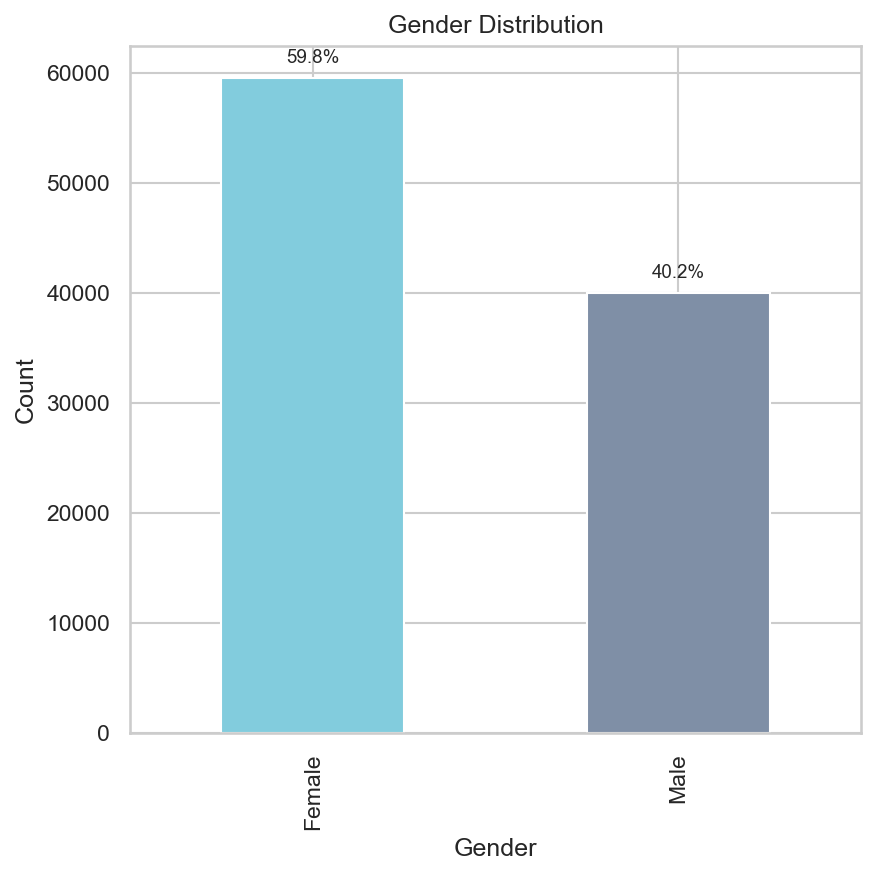

In [102]:
gender_counts = df['gender'].value_counts()
total = gender_counts.sum()
percentages = gender_counts / total * 100

plt.figure(figsize=(6, 6), dpi=150)
bars = gender_counts.plot(kind='bar', color=[color1, color2])

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

for bar, pct in zip(bars.patches, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + total*0.01, f'{pct:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('dataset_frequency_and_distribution_analysis/gender_distribution.png', dpi=150)
plt.show()

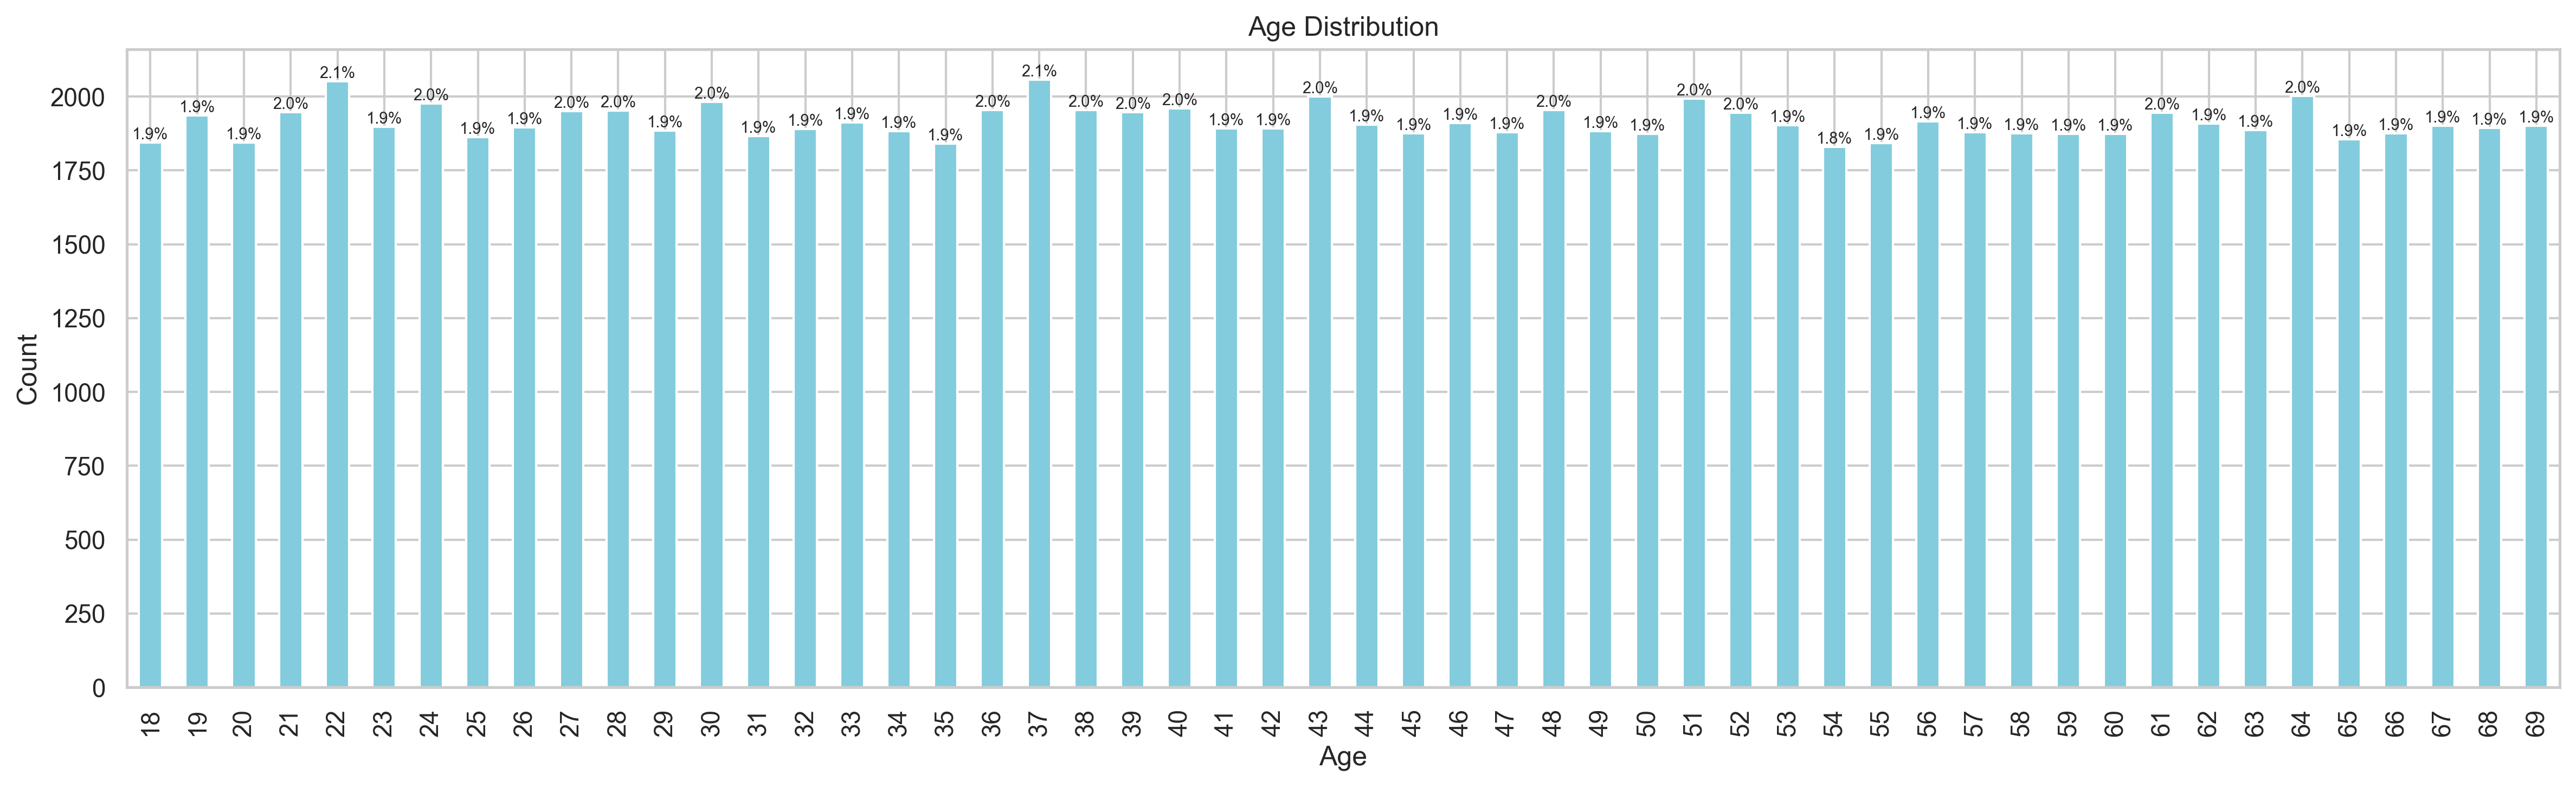

Min Age: 18
Max Age: 69
Mean Age: 43.4271
Standard Deviation: 14.9901


In [103]:
age_counts = df['age'].value_counts().sort_index()
total = age_counts.sum()
percentages = age_counts / total * 100

plt.figure(figsize=(16, 5), dpi=300)
bars = age_counts.plot(kind='bar', color=color1)

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

for bar, pct in zip(bars.patches, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height , f'{pct:.1f}%', ha='center', va='bottom', fontsize=7)

plt.tight_layout()
plt.savefig('dataset_frequency_and_distribution_analysis/age_distribution.png', dpi=300)
plt.show()

min_age = df['age'].min()
max_age = df['age'].max()
mean_age = df['age'].mean()
std_age = df['age'].std()

print(f"Min Age: {min_age}")
print(f"Max Age: {max_age}")
print(f"Mean Age: {mean_age:.4f}")
print(f"Standard Deviation: {std_age:.4f}")

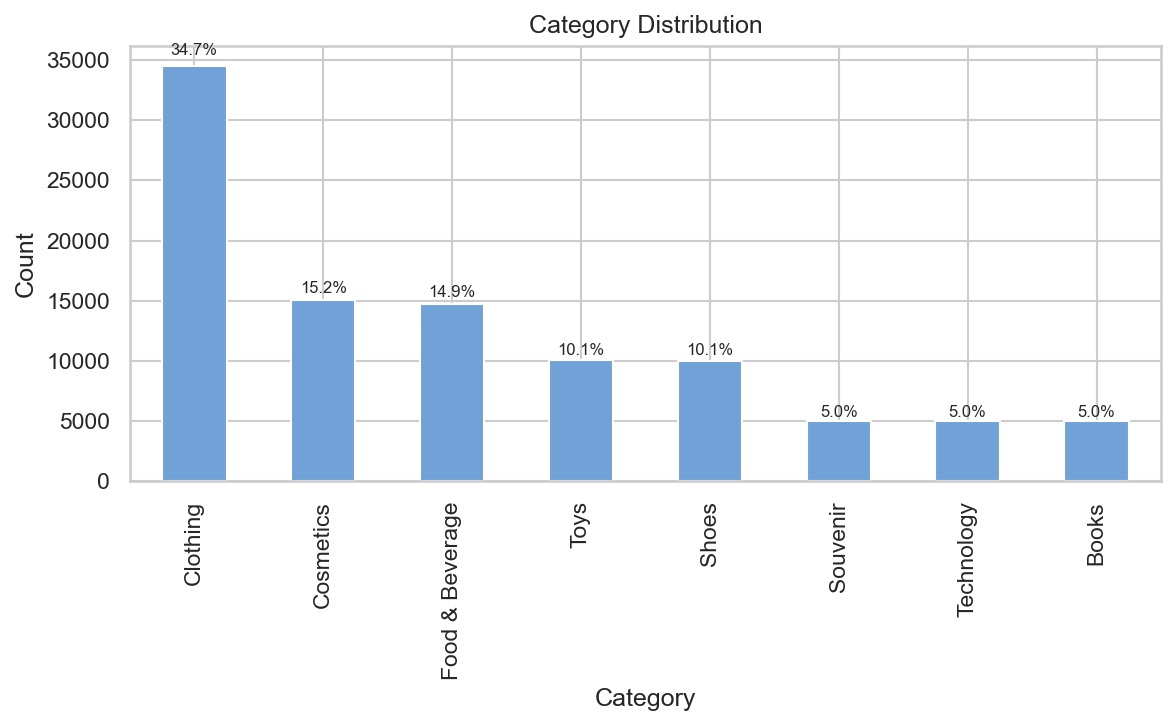

In [104]:
category_counts = df['category'].value_counts()
total = category_counts.sum()
percentages = category_counts / total * 100

plt.figure(figsize=(8, 5), dpi=150)
bars = category_counts.plot(kind='bar', color='#70a1d7')

plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')

for bar, pct in zip(bars.patches, percentages):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height * 1.02, 
        f'{pct:.1f}%',
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.tight_layout()
plt.savefig('dataset_frequency_and_distribution_analysis/category_distribution.png', dpi=150)
plt.show()


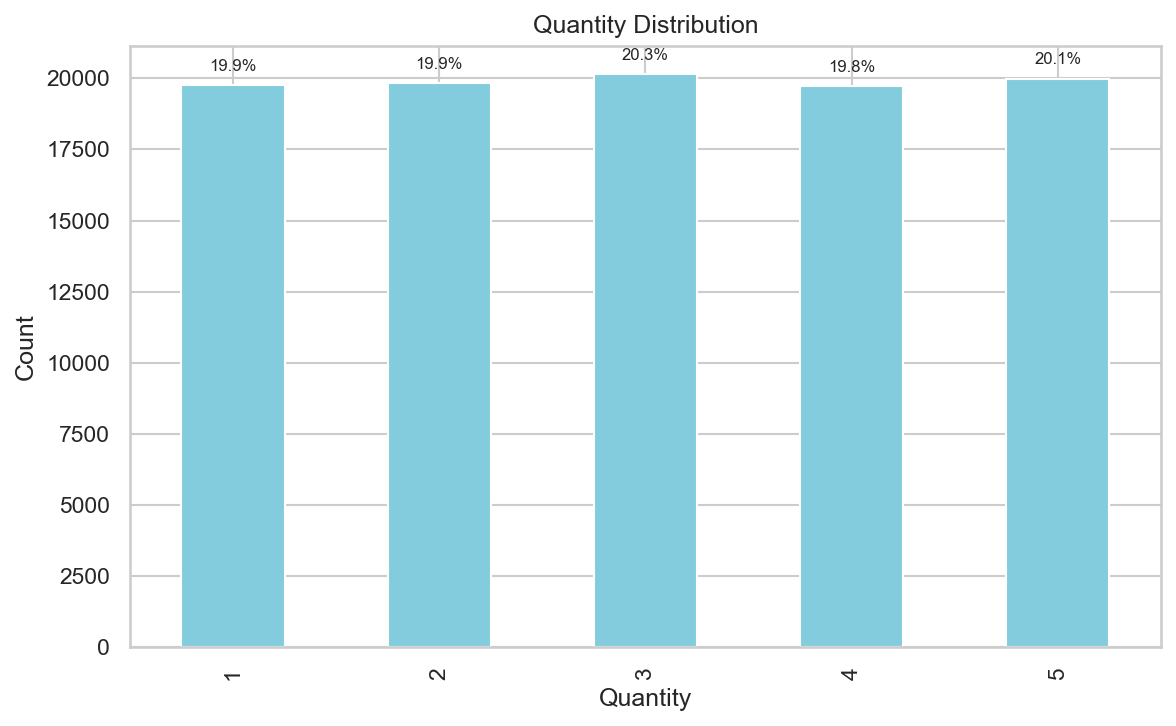

Mode Quantity: 3
Median Quantity: 3.0
Mean Quantity: 3.0034
Standard Deviation: 1.4130


In [105]:
quantity_counts = df['quantity'].value_counts().sort_index()
total = quantity_counts.sum()
percentages = quantity_counts / total * 100

plt.figure(figsize=(8, 5), dpi=150)
bars = quantity_counts.plot(kind='bar', color='#82ccdd')

plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Count')

for bar, pct in zip(bars.patches, percentages):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height * 1.02,
        f'{pct:.1f}%',
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.tight_layout()
plt.savefig('dataset_frequency_and_distribution_analysis/quantity_distribution.png', dpi=150)
plt.show()

mode_quantity = df['quantity'].mode().iloc[0]
median_quantity = df['quantity'].median()
mean_quantity = df['quantity'].mean()
std_quantity = df['quantity'].std()

print(f"Mode Quantity: {mode_quantity}")
print(f"Median Quantity: {median_quantity}")
print(f"Mean Quantity: {mean_quantity:.4f}")
print(f"Standard Deviation: {std_quantity:.4f}")


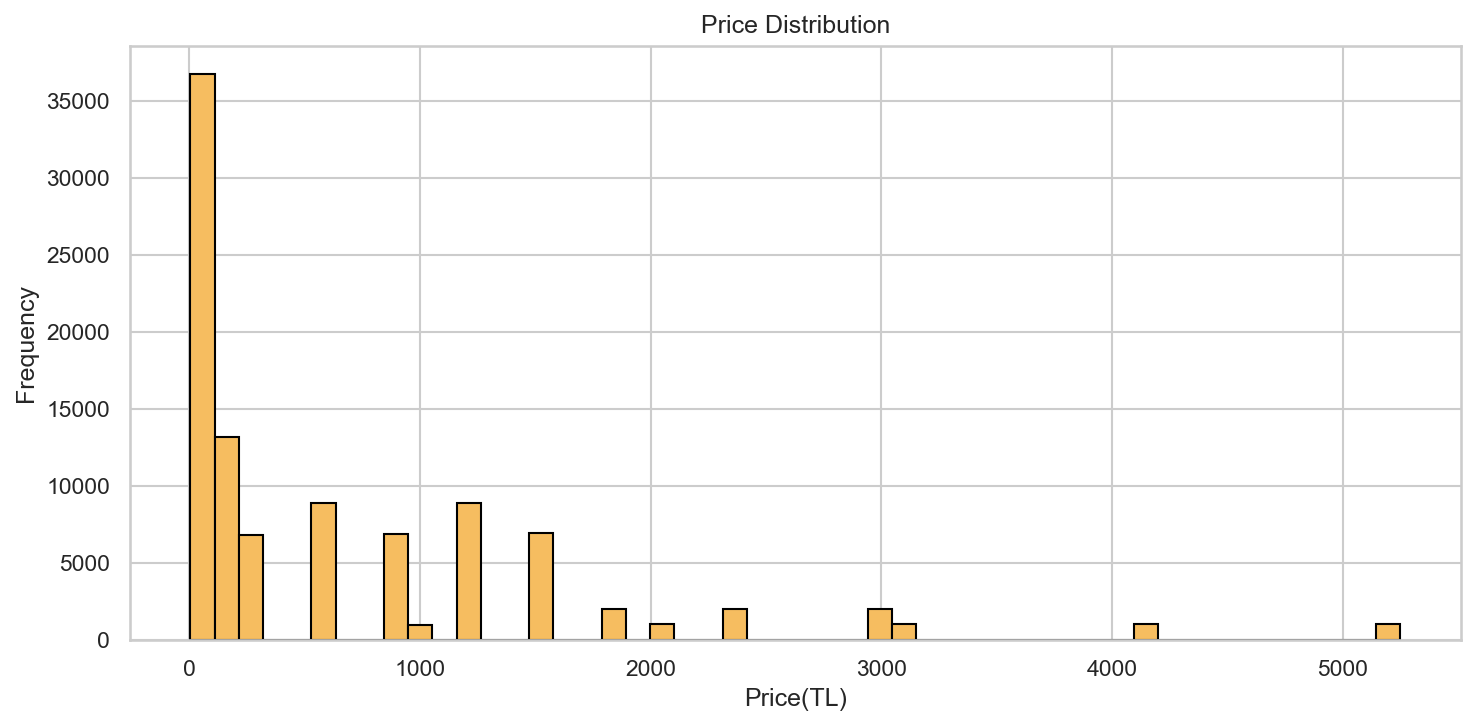

Min Price(TL): 5.2300
Max Price(TL): 5250.0000
Mean Price(TL): 689.2563
Median Price(TL): 203.3000
Mode Price(TL): 600.1600
Standard Deviation: 941.1846


In [106]:
plt.figure(figsize=(10, 5), dpi=150)
plt.hist(df['price'], bins=50, color='#f6bd60', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price(TL)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('dataset_frequency_and_distribution_analysis/price_histogram.png', dpi=150)
plt.show()

price_min = df['price'].min()
price_max = df['price'].max()
price_mean = df['price'].mean()
price_median = df['price'].median()
price_mode = df['price'].mode().iloc[0]
price_std = df['price'].std()

print(f"Min Price(TL): {price_min:.4f}")
print(f"Max Price(TL): {price_max:.4f}")
print(f"Mean Price(TL): {price_mean:.4f}")
print(f"Median Price(TL): {price_median:.4f}")
print(f"Mode Price(TL): {price_mode:.4f}")
print(f"Standard Deviation: {price_std:.4f}")

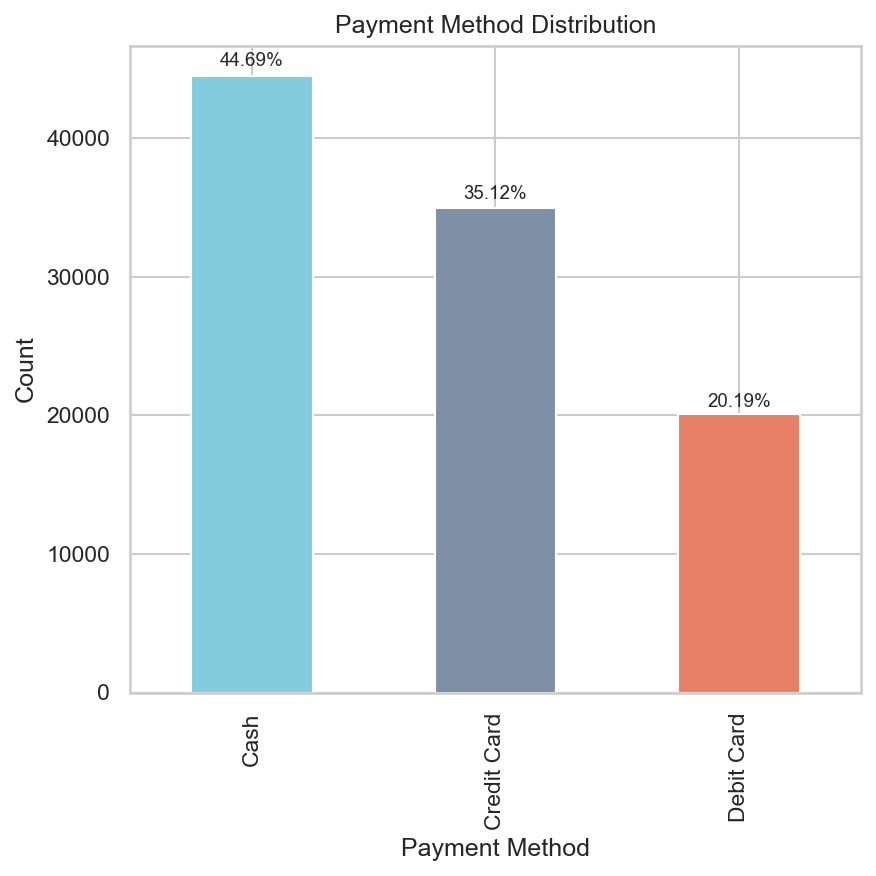

In [107]:
payment_counts = df['payment_method'].value_counts()
total = payment_counts.sum()
percentages = payment_counts / total * 100

plt.figure(figsize=(6, 6), dpi=150)
bars = payment_counts.plot(kind='bar', color=[color1, color2, color3])
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')

for bar, pct in zip(bars.patches, percentages):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height * 1.01,
        f'{pct:.2f}%',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.savefig('dataset_frequency_and_distribution_analysis/payment_method_distribution.png', dpi=150)
plt.show()


In [108]:
date analizi düşün

SyntaxError: invalid syntax (2842125843.py, line 1)

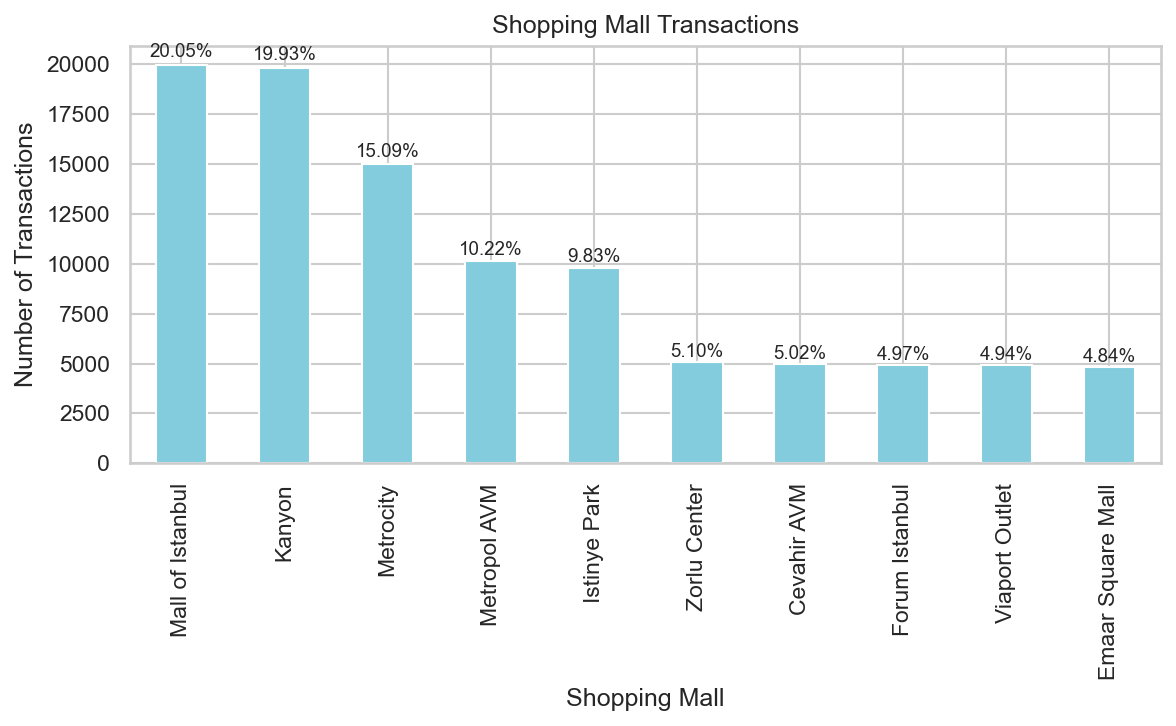

Mode Shopping Mall: Mall of Istanbul


In [109]:
mall_counts = df['shopping_mall'].value_counts()
total = mall_counts.sum()
percentages = mall_counts / total * 100

plt.figure(figsize=(8, 5), dpi=150)
bars = mall_counts.plot(kind='bar', color=color1)
plt.title('Shopping Mall Transactions')
plt.xlabel('Shopping Mall')
plt.ylabel('Number of Transactions')

for bar, pct in zip(bars.patches, percentages):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height * 1.01,
        f'{pct:.2f}%',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.savefig('dataset_frequency_and_distribution_analysis/shopping_mall_transactions_distributiond.png', dpi=150)
plt.show()

print(f"Mode Shopping Mall: {df['shopping_mall'].mode().iloc[0]}")


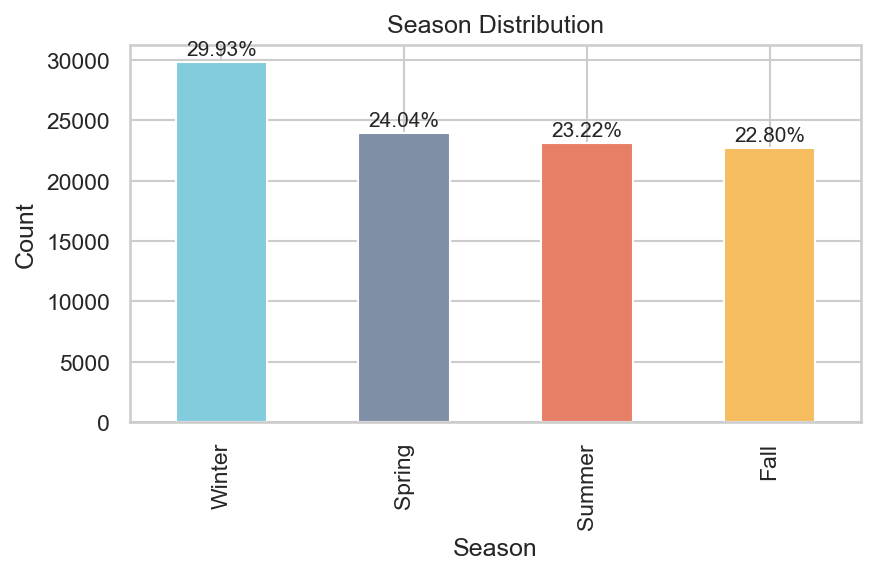

Mode of season: Winter


In [110]:
counts = df['season'].value_counts()
total = counts.sum()
percentages = counts / total * 100

plt.figure(figsize=(6,4), dpi=150)
bars = counts.plot(kind='bar', color=[color1, color2, color3, color4][:len(counts)])
plt.title('Season Distribution')
plt.xlabel('Season')
plt.ylabel('Count')

for bar, pct in zip(bars.patches, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height * 1.01, f'{pct:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('dataset_frequency_and_distribution_analysis/season_distribution.png', dpi=150)
plt.show()

print(f"Mode of season: {df['season'].mode().iloc[0]}")

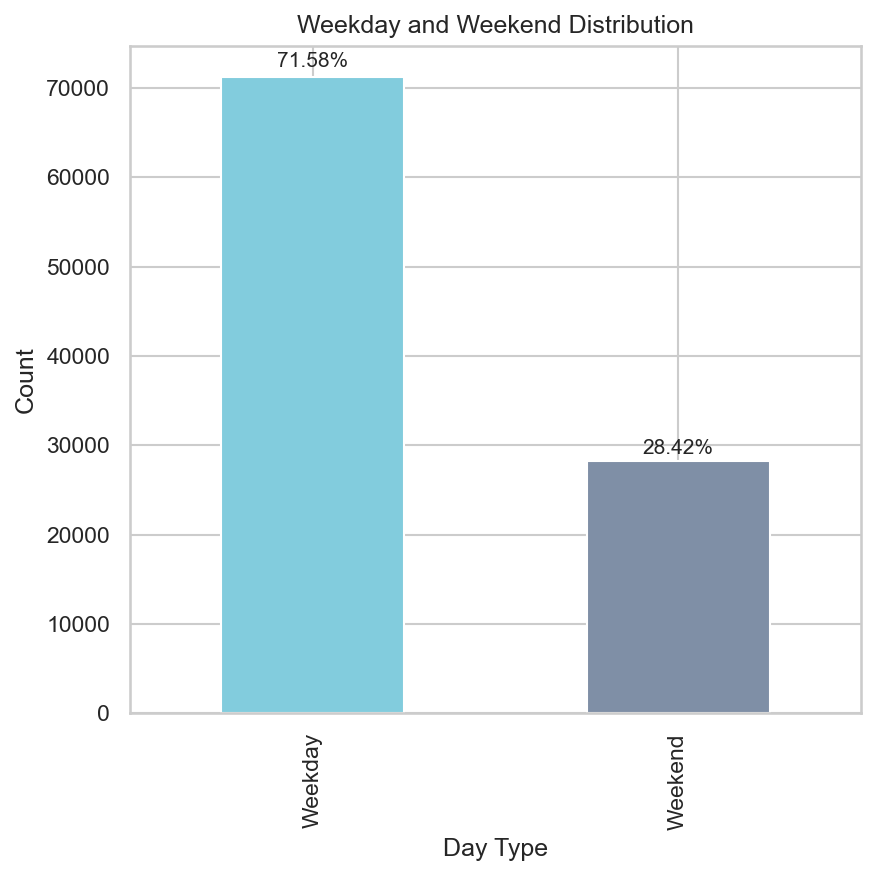

Mode of is_weekday: Weekday


In [111]:
df['is_weekday_label'] = df['is_weekday'].map({0: 'Weekend', 1: 'Weekday'})

counts = df['is_weekday_label'].value_counts().sort_index()
total = counts.sum()
percentages = counts / total * 100

plt.figure(figsize=(6,6), dpi=150)
bars = counts.plot(kind='bar', color=[color1, color2])
plt.title('Weekday and Weekend Distribution')
plt.xlabel('Day Type')
plt.ylabel('Count')

for bar, pct in zip(bars.patches, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height * 1.01, f'{pct:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('dataset_frequency_and_distribution_analysis/is_weekday_distribution.png', dpi=150)
plt.show()

print(f"Mode of is_weekday: {df['is_weekday_label'].mode().iloc[0]}")

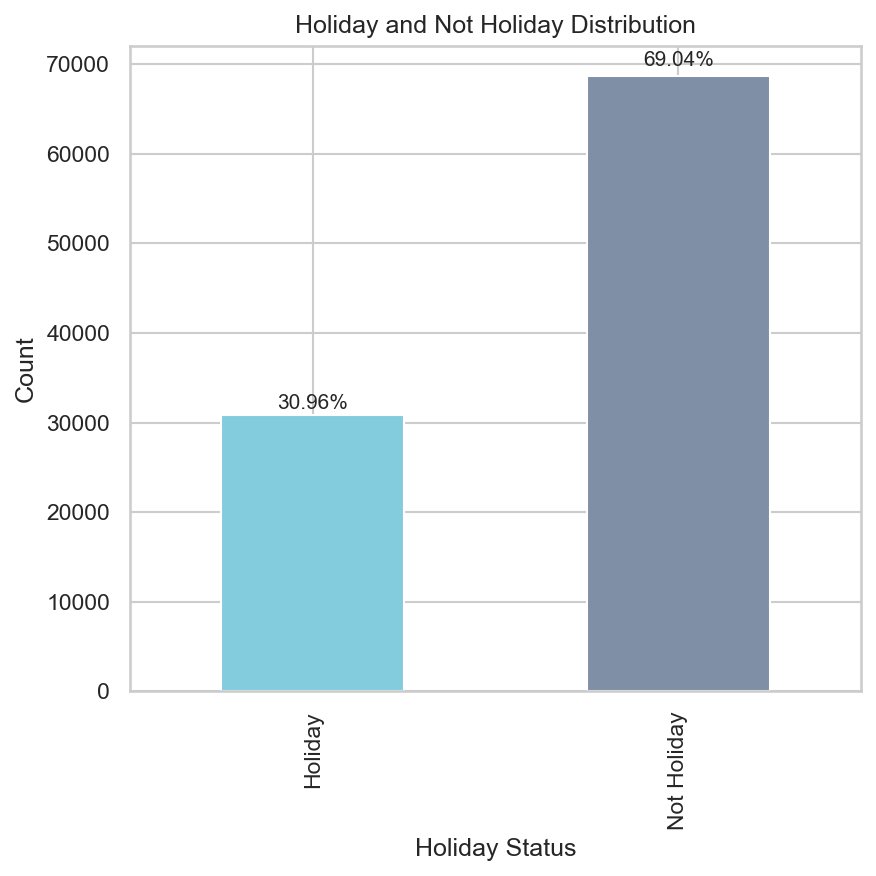

Mode of is_holiday: Not Holiday


In [112]:
df['is_holiday_label'] = df['is_holiday'].map({0: 'Not Holiday', 1: 'Holiday'})

counts = df['is_holiday_label'].value_counts().sort_index()
total = counts.sum()
percentages = counts / total * 100

plt.figure(figsize=(6,6), dpi=150)
bars = counts.plot(kind='bar', color=[color1, color2])
plt.title('Holiday and Not Holiday Distribution')
plt.xlabel('Holiday Status')
plt.ylabel('Count')

for bar, pct in zip(bars.patches, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height * 1.01, f'{pct:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('dataset_frequency_and_distribution_analysis/is_holiday_distribution.png', dpi=150)
plt.show()

print(f"Mode of is_holiday: {df['is_holiday_label'].mode().iloc[0]}")


In [120]:
df_unique = df.drop_duplicates(subset=["Year", "Month"]).sort_values(by=["Year", "Month"])
df_unique["Date"] = pd.to_datetime(df_unique["Year"].astype(str) + "-" + df_unique["Month"].astype(str) + "-01")
df_unique["Year_Month"] = df_unique["Year"].astype(str) + "-" + df_unique["Month"].astype(str).str.zfill(2)

plt.figure(figsize=(14, 5), dpi=150)
plt.plot(df_unique["Date"], df_unique["Econ_Conf"], marker='o', linestyle='-', color=color1)

plt.title('Economic Confidence Index Over Time')
plt.xlabel('Date')
plt.ylabel('Economic Confidence Index')
plt.grid(True)

plt.xticks(ticks=df_unique["Date"], labels=df_unique["Year_Month"], rotation=90)
plt.tight_layout()
plt.savefig('economic_confidence_index_lineplot.png', dpi=150)
plt.show()

print(f"Statistics for Economic Confidence Index:")
print(f" Min: {df_unique['Econ_Conf'].min():.4f}")
print(f" Max: {df_unique['Econ_Conf'].max():.4f}")
print(f" Mean: {df_unique['Econ_Conf'].mean():.4f}")
print(f" Median: {df_unique['Econ_Conf'].median():.4f}")
print(f" Mode: {df_unique['Econ_Conf'].mode().iloc[0]:.4f}")
print(f" Standard Deviation: {df_unique['Econ_Conf'].std():.4f}")


KeyError: Index(['Year', 'Month'], dtype='object')

In [114]:
df_unique = df.drop_duplicates(subset=["Year", "Month"]).sort_values(by=["Year", "Month"])
df_unique["Date"] = pd.to_datetime(df_unique["Year"].astype(str) + "-" + df_unique["Month"].astype(str) + "-01")
df_unique["Year_Month"] = df_unique["Year"].astype(str) + "-" + df_unique["Month"].astype(str).str.zfill(2)

plt.figure(figsize=(14, 5), dpi=150)
plt.plot(df_unique["Date"], df_unique["Cons_Conf"], marker='o', linestyle='-', color=color2)

plt.title('Consumer Confidence Index Over Time')
plt.xlabel('Date')
plt.ylabel('Consumer Confidence Index')
plt.grid(True)

plt.xticks(ticks=df_unique["Date"], labels=df_unique["Year_Month"], rotation=90)
plt.tight_layout()
plt.savefig('consumer_confidence_index_lineplot.png', dpi=150)
plt.show()

print(f"Statistics for Consumer Confidence Index:")
print(f" Min: {df_unique['Cons_Conf'].min():.4f}")
print(f" Max: {df_unique['Cons_Conf'].max():.4f}")
print(f" Mean: {df_unique['Cons_Conf'].mean():.4f}")
print(f" Median: {df_unique['Cons_Conf'].median():.4f}")
print(f" Mode: {df_unique['Cons_Conf'].mode().iloc[0]:.4f}")
print(f" Standard Deviation: {df_unique['Cons_Conf'].std():.4f}")


KeyError: Index(['Year', 'Month'], dtype='object')

In [115]:
df_unique = df.drop_duplicates(subset=["Year", "Month"]).sort_values(by=["Year", "Month"])
df_unique["Date"] = pd.to_datetime(df_unique["Year"].astype(str) + "-" + df_unique["Month"].astype(str) + "-01")
df_unique["Year_Month"] = df_unique["Year"].astype(str) + "-" + df_unique["Month"].astype(str).str.zfill(2)

plt.figure(figsize=(14, 5), dpi=150)
plt.plot(df_unique["Date"], df_unique["RealSec_Conf"], marker='o', linestyle='-', color=color3)

plt.title('Real Sector Confidence Index Over Time')
plt.xlabel('Date')
plt.ylabel('Real Sector Confidence Index')
plt.grid(True)

plt.xticks(ticks=df_unique["Date"], labels=df_unique["Year_Month"], rotation=90)
plt.tight_layout()
plt.savefig('real_sector_confidence_index_lineplot.png', dpi=150)
plt.show()

print(f"Statistics for Real Sector Confidence Index:")
print(f" Min: {df_unique['RealSec_Conf'].min():.4f}")
print(f" Max: {df_unique['RealSec_Conf'].max():.4f}")
print(f" Mean: {df_unique['RealSec_Conf'].mean():.4f}")
print(f" Median: {df_unique['RealSec_Conf'].median():.4f}")
print(f" Mode: {df_unique['RealSec_Conf'].mode().iloc[0]:.4f}")
print(f" Standard Deviation: {df_unique['RealSec_Conf'].std():.4f}")


KeyError: Index(['Year', 'Month'], dtype='object')

In [116]:
df_unique = df.drop_duplicates(subset=["Year", "Month"]).sort_values(by=["Year", "Month"])
df_unique["Date"] = pd.to_datetime(df_unique["Year"].astype(str) + "-" + df_unique["Month"].astype(str) + "-01")
df_unique["Year_Month"] = df_unique["Year"].astype(str) + "-" + df_unique["Month"].astype(str).str.zfill(2)

plt.figure(figsize=(14, 5), dpi=150)
plt.plot(df_unique["Date"], df_unique["Serv_Conf"], marker='o', linestyle='-', color=color4)

plt.title('Services Confidence Index Over Time')
plt.xlabel('Date')
plt.ylabel('Services Confidence Index')
plt.grid(True)

plt.xticks(ticks=df_unique["Date"], labels=df_unique["Year_Month"], rotation=90)
plt.tight_layout()
plt.savefig('services_confidence_index_lineplot.png', dpi=150)
plt.show()

print(f"Statistics for Services Confidence Index:")
print(f" Min: {df_unique['Serv_Conf'].min():.4f}")
print(f" Max: {df_unique['Serv_Conf'].max():.4f}")
print(f" Mean: {df_unique['Serv_Conf'].mean():.4f}")
print(f" Median: {df_unique['Serv_Conf'].median():.4f}")
print(f" Mode: {df_unique['Serv_Conf'].mode().iloc[0]:.4f}")
print(f" Standard Deviation: {df_unique['Serv_Conf'].std():.4f}")


KeyError: Index(['Year', 'Month'], dtype='object')

In [117]:
df_unique = df.drop_duplicates(subset=["Year", "Month"]).sort_values(by=["Year", "Month"])
df_unique["Date"] = pd.to_datetime(df_unique["Year"].astype(str) + "-" + df_unique["Month"].astype(str) + "-01")
df_unique["Year_Month"] = df_unique["Year"].astype(str) + "-" + df_unique["Month"].astype(str).str.zfill(2)

plt.figure(figsize=(14, 5), dpi=150)
plt.plot(df_unique["Date"], df_unique["Retail_Conf"], marker='o', linestyle='-', color=color5)

plt.title('Retail Trade Confidence Index Over Time')
plt.xlabel('Date')
plt.ylabel('Retail Trade Confidence Index')
plt.grid(True)

plt.xticks(ticks=df_unique["Date"], labels=df_unique["Year_Month"], rotation=90)
plt.tight_layout()
plt.savefig('retail_trade_confidence_index_lineplot.png', dpi=150)
plt.show()

print(f"Statistics for Retail Trade Confidence Index:")
print(f" Min: {df_unique['Retail_Conf'].min():.4f}")
print(f" Max: {df_unique['Retail_Conf'].max():.4f}")
print(f" Mean: {df_unique['Retail_Conf'].mean():.4f}")
print(f" Median: {df_unique['Retail_Conf'].median():.4f}")
print(f" Mode: {df_unique['Retail_Conf'].mode().iloc[0]:.4f}")
print(f" Standard Deviation: {df_unique['Retail_Conf'].std():.4f}")


KeyError: Index(['Year', 'Month'], dtype='object')

In [118]:
df_unique = df.drop_duplicates(subset=["Year", "Month"]).sort_values(by=["Year", "Month"])
df_unique["Date"] = pd.to_datetime(df_unique["Year"].astype(str) + "-" + df_unique["Month"].astype(str) + "-01")
df_unique["Year_Month"] = df_unique["Year"].astype(str) + "-" + df_unique["Month"].astype(str).str.zfill(2)

plt.figure(figsize=(14, 5), dpi=150)
plt.plot(df_unique["Date"], df_unique["Constr_Conf"], marker='o', linestyle='-', color=color6)

plt.title('Construction Confidence Index Over Time')
plt.xlabel('Date')
plt.ylabel('Construction Confidence Index')
plt.grid(True)

plt.xticks(ticks=df_unique["Date"], labels=df_unique["Year_Month"], rotation=90)
plt.tight_layout()
plt.savefig('construction_confidence_index_lineplot.png', dpi=150)
plt.show()

print(f"Statistics for Construction Confidence Index:")
print(f" Min: {df_unique['Constr_Conf'].min():.4f}")
print(f" Max: {df_unique['Constr_Conf'].max():.4f}")
print(f" Mean: {df_unique['Constr_Conf'].mean():.4f}")
print(f" Median: {df_unique['Constr_Conf'].median():.4f}")
print(f" Mode: {df_unique['Constr_Conf'].mode().iloc[0]:.4f}")
print(f" Standard Deviation: {df_unique['Constr_Conf'].std():.4f}")


KeyError: Index(['Year', 'Month'], dtype='object')

In [119]:
df_unique = df.drop_duplicates(subset=["Year", "Month"]).sort_values(by=["Year", "Month"])
df_unique["Date"] = pd.to_datetime(df_unique["Year"].astype(str) + "-" + df_unique["Month"].astype(str) + "-01")
df_unique["Year_Month"] = df_unique["Year"].astype(str) + "-" + df_unique["Month"].astype(str).str.zfill(2)

plt.figure(figsize=(16, 6), dpi=150)

plt.plot(df_unique["Date"], df_unique["Econ_Conf"], marker='o', linestyle='-', color=color1, label='Economic Confidence Index')
plt.plot(df_unique["Date"], df_unique["Cons_Conf"], marker='o', linestyle='-', color=color2, label='Consumer Confidence Index')
plt.plot(df_unique["Date"], df_unique["RealSec_Conf"], marker='o', linestyle='-', color=color3, label='Real Sector Confidence Index')
plt.plot(df_unique["Date"], df_unique["Serv_Conf"], marker='o', linestyle='-', color=color4, label='Services Confidence Index')
plt.plot(df_unique["Date"], df_unique["Retail_Conf"], marker='o', linestyle='-', color=color5, label='Retail Trade Confidence Index')
plt.plot(df_unique["Date"], df_unique["Constr_Conf"], marker='o', linestyle='-', color=color6, label='Construction Confidence Index')

plt.title('Economic Confidence Indices Over Time')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Confidence Index Value')
plt.grid(True)

plt.xticks(ticks=df_unique["Date"], labels=df_unique["Year_Month"], rotation=90)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('all_confidence_indices_lineplot.png', dpi=150)
plt.show()


KeyError: Index(['Year', 'Month'], dtype='object')